In [1]:
# Here I try to automate the data retrieval:

import os
import numpy as np
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/Cardinallop/Titanic/master/"
TITANIC_PATH = os.path.join("datasets", "titanicData")
TITANIC_URL = DOWNLOAD_ROOT + "train.csv"
TITANICTEST_URL = DOWNLOAD_ROOT + "test.csv"

def fetch_train_data(titanic_url=TITANIC_URL, titanic_path=TITANIC_PATH):
    if not os.path.isdir(titanic_path):
        os.makedirs(titanic_path)
    tgz_path = os.path.join(titanic_path, "train.csv")
    urllib.request.urlretrieve(titanic_url, tgz_path)
    

def fetch_test_data(titanic_url=TITANICTEST_URL, titanic_path=TITANIC_PATH):
    if not os.path.isdir(titanic_path):
        os.makedirs(titanic_path)
    tgz_path = os.path.join(titanic_path, "test.csv")
    urllib.request.urlretrieve(titanic_url, tgz_path)

In [2]:
fetch_train_data()
fetch_test_data()

In [3]:
import pandas as pd

def load_train_data(titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, "train.csv")
    return pd.read_csv(csv_path)

def load_test_data(titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, "test.csv")
    return pd.read_csv(csv_path)

In [4]:
# Let's take a look at train and test datas: 

train = load_train_data()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test = load_test_data()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### If you look at the training data info above, there is total of 891 values, however, the categories of Age and Cabin has a lot of missing values; we have to take care fo that if we want to make a good prediction. 

In [7]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


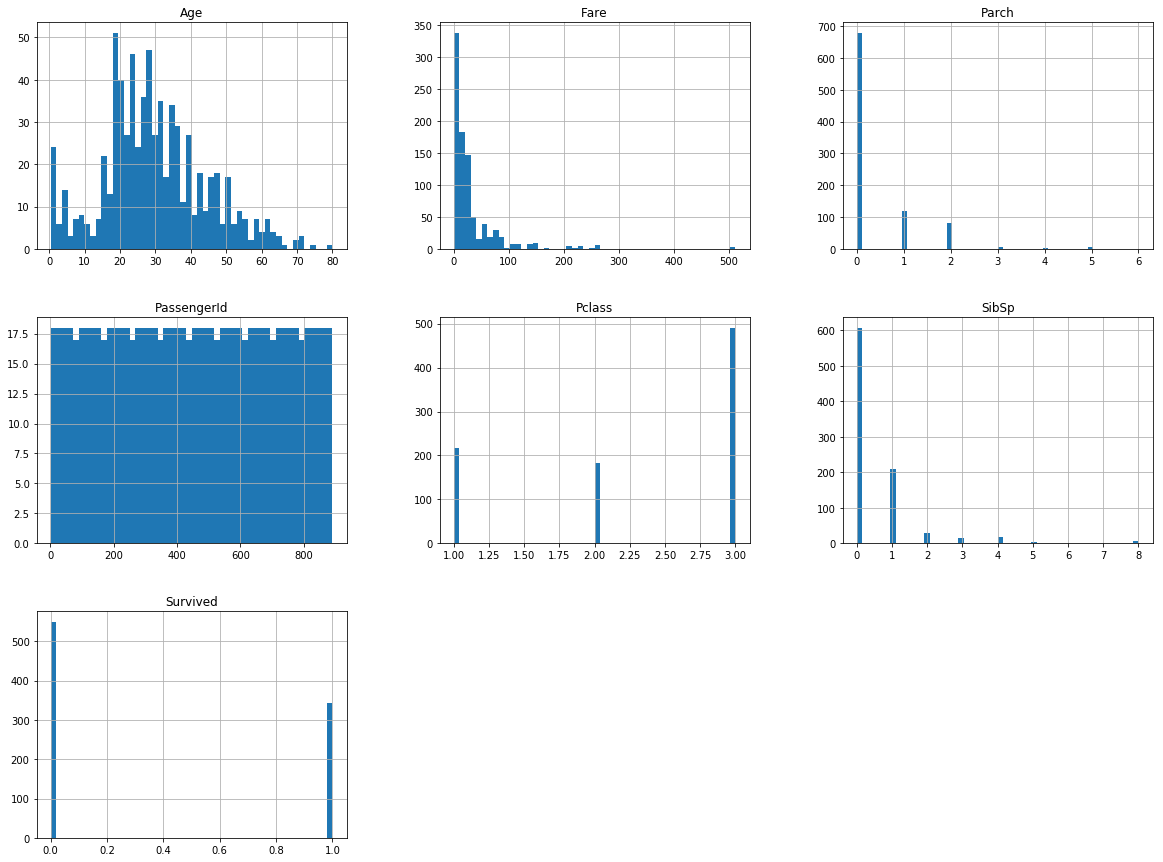

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt 
train.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(train, test_size=0.2, random_state=42)

In [12]:
len(train_set)

712

In [13]:
len(test_set)

179

In [14]:
train = train_set.copy()

In [15]:
corr_matrix = train.corr()

In [16]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.246641
Parch          0.078311
PassengerId    0.019979
SibSp         -0.047602
Age           -0.059695
Pclass        -0.321750
Name: Survived, dtype: float64

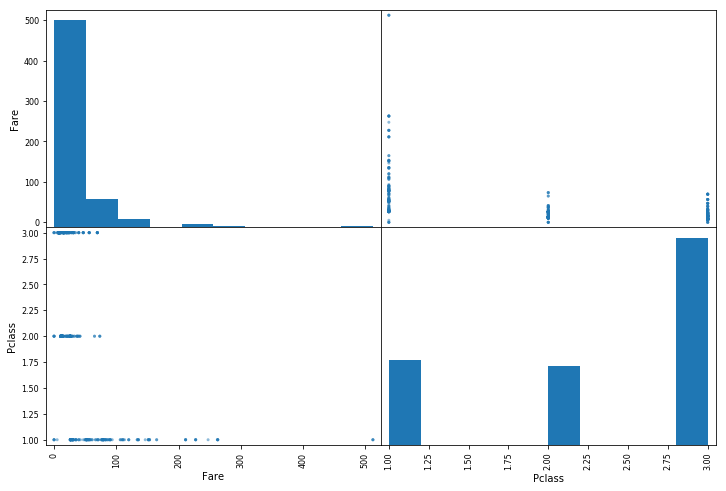

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["Fare", "Pclass"]
scatter_matrix(train[attributes], figsize=(12, 8))
plt.show()


# I should apply different colors for each attribute later..

In [18]:
train = train_set.drop("Survived", axis=1)
train_labels = train_set["Survived"].copy() 

In [19]:
train = train.drop("Cabin", axis=1)
train = train.drop("Embarked", axis=1)
median = train["Age"].median()
train["Age"].fillna(median, inplace=True)


# I should check ack here for possible errors

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 9 columns):
PassengerId    712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 55.6+ KB


In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

train_num = train.drop("PassengerId", axis=1)
train_num = train_num.drop("Name", axis=1)
train_num = train_num.drop("Sex", axis=1)
train_num = train_num.drop("Ticket", axis=1)


In [22]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 5 columns):
Pclass    712 non-null int64
Age       712 non-null float64
SibSp     712 non-null int64
Parch     712 non-null int64
Fare      712 non-null float64
dtypes: float64(2), int64(3)
memory usage: 33.4 KB


In [23]:
imputer.fit(train_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [24]:
imputer.statistics_

array([ 3.    , 28.    ,  0.    ,  0.    , 14.4542])

In [25]:
train_num.median().values

array([ 3.    , 28.    ,  0.    ,  0.    , 14.4542])

In [26]:
X = imputer.transform(train_num)

In [27]:
titanic_tr = pd.DataFrame(X, columns=train_num.columns)

In [28]:
titanic_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 5 columns):
Pclass    712 non-null float64
Age       712 non-null float64
SibSp     712 non-null float64
Parch     712 non-null float64
Fare      712 non-null float64
dtypes: float64(5)
memory usage: 27.9 KB


In [29]:
titanic_tr.head()

,Pclass,Age,SibSp,Parch,Fare
0,1.0,45.5,0.0,0.0,28.5000
1,2.0,23.0,0.0,0.0,13.0000
2,3.0,32.0,0.0,0.0,7.9250
3,3.0,26.0,1.0,0.0,7.8542
4,3.0,6.0,4.0,2.0,31.2750


In [30]:
train_cat = train[["Sex"]]
train_cat.head()

,Sex
331,male
733,male
382,male
704,male
813,female


In [31]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
train_cat_encoded = ordinal_encoder.fit_transform(train_cat)
train_cat_encoded[:10]


array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [33]:
# Here I try to create a pipeline that automatically transforms the data into usable shape

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

train_num_tr = num_pipeline.fit_transform(train_num)

In [35]:
train_num_tr

array([[-1.61413602,  1.25364106, -0.47072241, -0.47934164, -0.07868358],
       [-0.40055118, -0.47728355, -0.47072241, -0.47934164, -0.37714494],
       [ 0.81303367,  0.21508629, -0.47072241, -0.47934164, -0.47486697],
       ...,
       [ 0.81303367,  0.90745614,  1.23056874, -0.47934164, -0.35580399],
       [-1.61413602, -1.1696534 ,  0.37992316,  2.04874166,  1.68320121],
       [-1.61413602, -0.63114352, -0.47072241,  0.78470001,  0.86074761]])

In [36]:
from sklearn.compose import ColumnTransformer

num_attribs = list(train_num)
cat_attribs = ["Sex"]


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ])

train_prepared = full_pipeline.fit_transform(train_set)

In [37]:
train_prepared

array([[-1.61413602,  1.25364106, -0.47072241, -0.47934164, -0.07868358,
         1.        ],
       [-0.40055118, -0.47728355, -0.47072241, -0.47934164, -0.37714494,
         1.        ],
       [ 0.81303367,  0.21508629, -0.47072241, -0.47934164, -0.47486697,
         1.        ],
       ...,
       [ 0.81303367,  0.90745614,  1.23056874, -0.47934164, -0.35580399,
         1.        ],
       [-1.61413602, -1.1696534 ,  0.37992316,  2.04874166,  1.68320121,
         0.        ],
       [-1.61413602, -0.63114352, -0.47072241,  0.78470001,  0.86074761,
         1.        ]])

# 1-Model:  DecisionTree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_prepared, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Testing and validation in a small scale:

In [39]:
some_dat = train.iloc[:5]
some_labs = train_labels.iloc[:5]
some_dat_prepared = full_pipeline.transform(some_dat)
print("Predictions:", tree_clf.predict(some_dat_prepared))

print("Labels:", list(some_labs))


Predictions: [0 0 0 0 0]
Labels: [0, 0, 0, 0, 0]


#### Checking the Cross Val Score:

In [40]:
from sklearn.model_selection import cross_val_score
cvsscores = cross_val_score(tree_clf, train_prepared, train_labels,
                         scoring="accuracy", cv=10)

In [41]:
>>> def display_scores(scores):
...     print("Scores:", scores)
...     print("Mean:", scores.mean())
...     print("Standard deviation:", scores.std())
...
>>> display_scores(cvsscores)


Scores: [0.79166667 0.68055556 0.72222222 0.77777778 0.81690141 0.76056338
 0.77464789 0.76056338 0.82857143 0.74285714]
Mean: 0.7656326849988822
Standard deviation: 0.04145964309204849


#### Confusion Matrix:

In [42]:
from sklearn.model_selection import cross_val_predict

train_predo = cross_val_predict(tree_clf, train_prepared, train_labels, cv=10)

In [43]:
>>> from sklearn.metrics import confusion_matrix
>>> confusion_matrix(train_labels, train_predo)

array([[358,  86],
       [ 85, 183]])

#### Precision and Recall

In [44]:
>>> from sklearn.metrics import precision_score, recall_score
>>> precision_score(train_labels, train_predo)

0.6802973977695167

In [45]:
>>> recall_score(train_labels, train_predo) 

0.6828358208955224

#### F-score

In [46]:
>>> from sklearn.metrics import f1_score
>>> f1_score(train_labels, train_predo)

0.6815642458100559

#### P&R Curve

In [47]:
y_scores = cross_val_predict(tree_clf, train_prepared, train_labels, cv=3)

In [48]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(train_labels, y_scores)

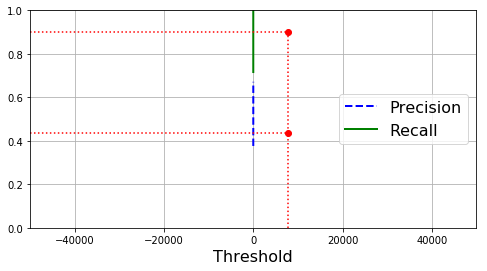

In [49]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])            

plt.figure(figsize=(8, 4))                      
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([7813, 7813], [0., 0.9], "r:")         
plt.plot([-50000, 7813], [0.9, 0.9], "r:")      
plt.plot([-50000, 7813], [0.4368, 0.4368], "r:")
plt.plot([7813], [0.9], "ro")                   
plt.plot([7813], [0.4368], "ro")                

plt.show()

In [50]:
(train_predo == (y_scores > 0)).all()

False

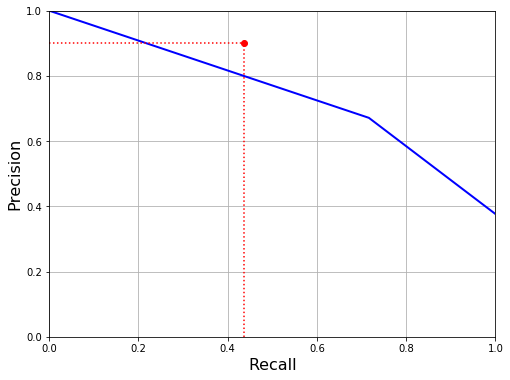

In [51]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")

plt.show()


#### ROC Curve

In [52]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(train_labels, y_scores)

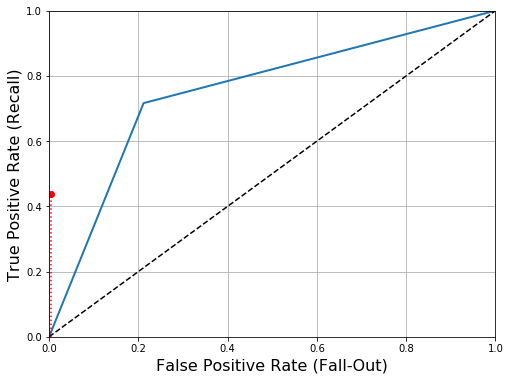

In [53]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                   
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
plt.plot([4.837e-3], [0.4368], "ro")               
                      
plt.show()

In [54]:
from sklearn.metrics import roc_auc_score

roc_auc_score(train_labels, y_scores)

0.7523530993680246

# 2-Model:  RandomForestClassifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(train_prepared, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

#### Test and Validation:

In [56]:
some_datq = train.iloc[:5]
some_labsq = train_labels.iloc[:5]
some_dat_preparedq = full_pipeline.transform(some_datq)
print("Predictions:", forest_clf.predict(some_dat_preparedq))

print("Labels:", list(some_labsq))

Predictions: [0 0 0 0 0]
Labels: [0, 0, 0, 0, 0]


#### Cross Val Score:

In [57]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, train_prepared, train_labels,
                                scoring="accuracy", cv=10)

display_scores(forest_scores)

Scores: [0.81944444 0.80555556 0.77777778 0.83333333 0.83098592 0.77464789
 0.74647887 0.8028169  0.85714286 0.78571429]
Mean: 0.8033897831433043
Standard deviation: 0.03137462807069756


#### Confusion Matrix

In [58]:
train_predo1 = cross_val_predict(forest_clf, train_prepared, train_labels, cv=10)

In [59]:
>>> from sklearn.metrics import confusion_matrix
>>> confusion_matrix(train_labels, train_predo1)

array([[381,  63],
       [ 77, 191]])

#### Precision and Recall

In [60]:
>>> from sklearn.metrics import precision_score, recall_score
>>> precision_score(train_labels, train_predo1)

0.7519685039370079

In [61]:
>>> recall_score(train_labels, train_predo1) 

0.7126865671641791

#### F_score

In [62]:
>>> from sklearn.metrics import f1_score
>>> f1_score(train_labels, train_predo1)

0.731800766283525

#### P&R Curve

In [63]:
y_scores1 = cross_val_predict(forest_clf, train_prepared, train_labels, cv=3)

In [64]:
from sklearn.metrics import precision_recall_curve

precisions1, recalls1, thresholds1 = precision_recall_curve(train_labels, y_scores1)

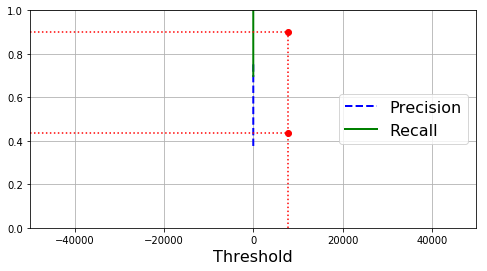

In [65]:
plt.figure(figsize=(8, 4))                      
plot_precision_recall_vs_threshold(precisions1, recalls1, thresholds1)
plt.plot([7813, 7813], [0., 0.9], "r:")         
plt.plot([-50000, 7813], [0.9, 0.9], "r:")      
plt.plot([-50000, 7813], [0.4368, 0.4368], "r:")
plt.plot([7813], [0.9], "ro")                   
plt.plot([7813], [0.4368], "ro")                

plt.show()

In [66]:
(train_predo1 == (y_scores1 > 0)).all()

False

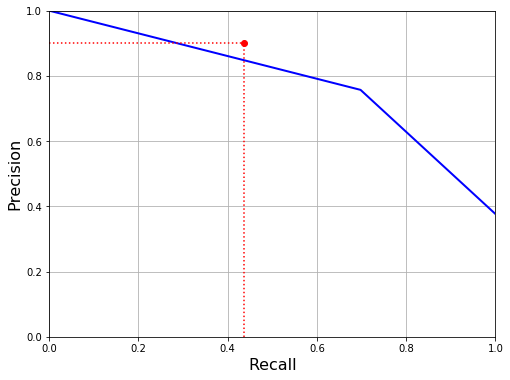

In [67]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions1, recalls1)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")

plt.show()



#### ROC Curve

In [68]:
fpr1, tpr1, thresholds1 = roc_curve(train_labels, y_scores1)

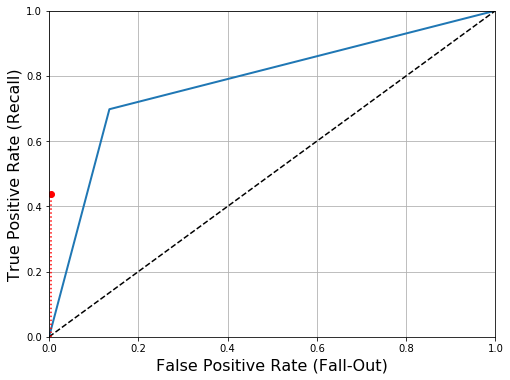

In [69]:
plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr1, tpr1)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
plt.plot([4.837e-3], [0.4368], "ro")               
                      
plt.show()

In [70]:
roc_auc_score(train_labels, y_scores1)

0.7813130294473578

# 3-Model: KNeighbors Classifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)

neigh.fit(train_prepared, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

#### Test & Validation:

In [72]:
some_dat6 = train.iloc[:10]
some_labs6 = train_labels.iloc[:10]
some_dat_prepared6 = full_pipeline.transform(some_dat6)
print("Predictions:", neigh.predict(some_dat_prepared6))

print("Labels:", list(some_labs6))

Predictions: [0 0 0 0 0 0 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


#### Cross Val Score:

In [73]:
KN_scores = cross_val_score(neigh, train_prepared, train_labels,
                                scoring="accuracy", cv=10)

display_scores(KN_scores)

Scores: [0.80555556 0.75       0.68055556 0.88888889 0.8028169  0.77464789
 0.78873239 0.78873239 0.71428571 0.85714286]
Mean: 0.785135814889336
Standard deviation: 0.05831505929527516


#### Confusion Matrix

In [74]:
train_predo2 = cross_val_predict(neigh, train_prepared, train_labels, cv=10)

In [75]:
>>> from sklearn.metrics import confusion_matrix
>>> confusion_matrix(train_labels, train_predo2)

array([[374,  70],
       [ 83, 185]])

#### Precision and Recall

In [76]:
>>> from sklearn.metrics import precision_score, recall_score
>>> precision_score(train_labels, train_predo2)

0.7254901960784313

In [77]:
>>> recall_score(train_labels, train_predo2) 

0.6902985074626866

#### F-score

In [78]:
>>> from sklearn.metrics import f1_score
>>> f1_score(train_labels, train_predo2)

0.7074569789674954

#### P&R Curve

In [79]:
y_scores2 = cross_val_predict(neigh, train_prepared, train_labels, cv=3)

In [80]:
from sklearn.metrics import precision_recall_curve

precisions2, recalls2, thresholds2 = precision_recall_curve(train_labels, y_scores2)

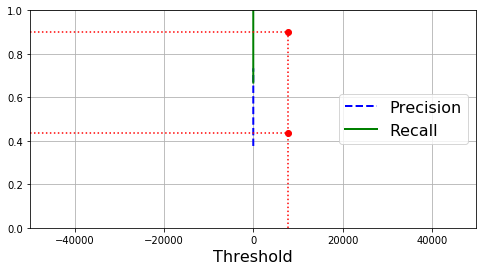

In [81]:
plt.figure(figsize=(8, 4))                      
plot_precision_recall_vs_threshold(precisions2, recalls2, thresholds2)
plt.plot([7813, 7813], [0., 0.9], "r:")         
plt.plot([-50000, 7813], [0.9, 0.9], "r:")      
plt.plot([-50000, 7813], [0.4368, 0.4368], "r:")
plt.plot([7813], [0.9], "ro")                   
plt.plot([7813], [0.4368], "ro")                

plt.show()

In [82]:
(train_predo2 == (y_scores2 > 0)).all()

False

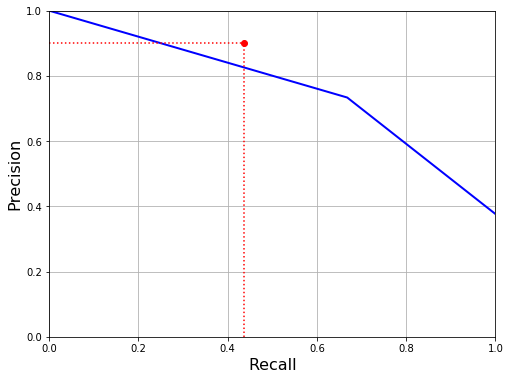

In [83]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions2, recalls2)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")

plt.show()

#### ROC Curve

In [84]:
fpr2, tpr2, thresholds2 = roc_curve(train_labels, y_scores2)

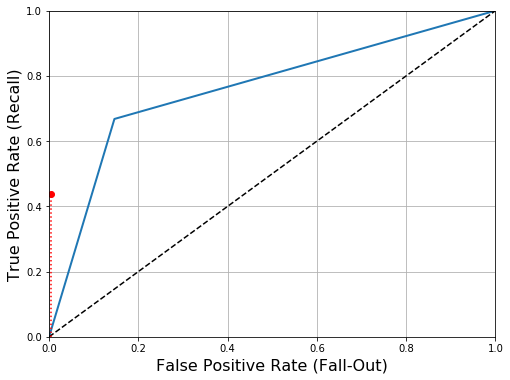

In [85]:
plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr2, tpr2)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
plt.plot([4.837e-3], [0.4368], "ro")               
                      
plt.show()

In [86]:
roc_auc_score(train_labels, y_scores2)

0.7607570256823988

# 4-Model: Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

log_reg.fit(train_prepared, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

#### Test & Validation:

In [88]:
some_dat99 = train.iloc[:10]
some_labs99 = train_labels.iloc[:10]
some_dat_prepared99 = full_pipeline.transform(some_dat99)
print("Predictions:", log_reg.predict(some_dat_prepared99))

print("Labels:", list(some_labs99))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


#### Cross Val Score:

In [89]:
log_scores = cross_val_score(log_reg, train_prepared, train_labels,
                                scoring="accuracy", cv=10)
display_scores(log_scores)

Scores: [0.84722222 0.77777778 0.72222222 0.875      0.83098592 0.74647887
 0.74647887 0.71830986 0.75714286 0.87142857]
Mean: 0.7893047171920411
Standard deviation: 0.057927075711272334


### Confusion Matrix

In [90]:
train_predo3 = cross_val_predict(log_reg, train_prepared, train_labels, cv=10)

In [91]:
>>> from sklearn.metrics import confusion_matrix
>>> confusion_matrix(train_labels, train_predo3)

array([[382,  62],
       [ 88, 180]])

#### Precision and Recall

In [92]:
>>> from sklearn.metrics import precision_score, recall_score
>>> precision_score(train_labels, train_predo3)

0.743801652892562

In [93]:
>>> recall_score(train_labels, train_predo3) 

0.6716417910447762

#### F-score

In [94]:
>>> from sklearn.metrics import f1_score
>>> f1_score(train_labels, train_predo3)

0.7058823529411764

#### P&R Curve

In [95]:
y_scores3 = cross_val_predict(log_reg, train_prepared, train_labels, cv=10)

In [96]:
from sklearn.metrics import precision_recall_curve

precisions3, recalls3, thresholds3 = precision_recall_curve(train_labels, y_scores3)

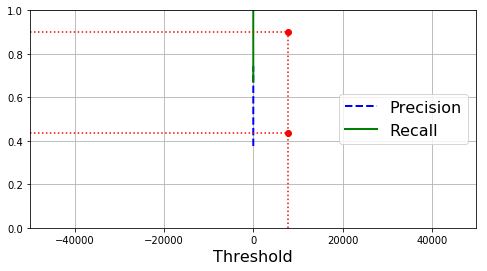

In [97]:
plt.figure(figsize=(8, 4))                      
plot_precision_recall_vs_threshold(precisions3, recalls3, thresholds3)
plt.plot([7813, 7813], [0., 0.9], "r:")         
plt.plot([-50000, 7813], [0.9, 0.9], "r:")      
plt.plot([-50000, 7813], [0.4368, 0.4368], "r:")
plt.plot([7813], [0.9], "ro")                   
plt.plot([7813], [0.4368], "ro")                

plt.show()

In [98]:
(train_predo3 == (y_scores3 > 0)).all()

True

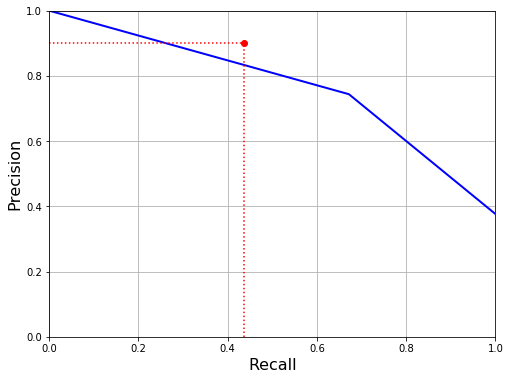

In [99]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions3, recalls3)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")

plt.show()

#### ROC Curve

In [100]:
fpr3, tpr3, thresholds3 = roc_curve(train_labels, y_scores3)

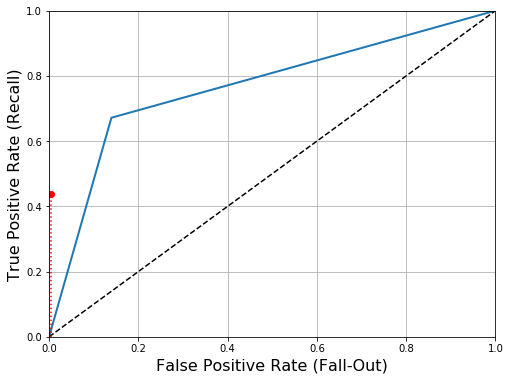

In [101]:
plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr3, tpr3)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
plt.plot([4.837e-3], [0.4368], "ro")               
                      
plt.show()

In [102]:
roc_auc_score(train_labels, y_scores3)

0.7660010757025681

# Fine-Tuning the Models

In [103]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]},
    {'bootstrap': [False],'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]},
  ]

forest_clf = RandomForestClassifier()

grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)

grid_search.fit(train_prepared, train_labels)


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt', 'auto'], 'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 5, 10], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]}, {'bootstrap': [False], 'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt', 'auto'], 'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 5, 10], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]}],
       pre_dispatch

In [104]:
>>> grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 6}

In [105]:
>>> grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=8,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=6, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [106]:
>>> cvres = grid_search.cv_results_

In [107]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


nan {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 4}
nan {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 6}
nan {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 9}
nan {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 4}
nan {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 6}
nan {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 9}
nan {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 4}
nan {'criterion': 'entropy', 'max_depth': 2, 'max_featu

nan {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 9}
nan {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 4}
nan {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 6}
nan {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 9}
nan {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 4}
nan {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 6}
nan {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'm

In [108]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003119,0.000168,0.000689,2.800053e-05,entropy,2,log2,1,2,4,...,0.766854,0.054605,1271,0.794376,0.690685,0.822496,0.700000,0.802102,0.761932,0.055219
1,0.004513,0.000526,0.000915,2.532503e-04,entropy,2,log2,1,2,6,...,0.796348,0.034019,853,0.799649,0.801406,0.785589,0.810526,0.770578,0.793549,0.013987
2,0.005497,0.000128,0.000836,1.713034e-05,entropy,2,log2,1,2,9,...,0.792135,0.033414,962,0.799649,0.790861,0.796134,0.794737,0.791594,0.794595,0.003190
3,0.002698,0.000030,0.000566,1.495050e-05,entropy,2,log2,1,3,4,...,0.796348,0.035236,853,0.785589,0.785589,0.799649,0.817544,0.784588,0.794592,0.012764
4,0.003789,0.000022,0.000670,8.110999e-06,entropy,2,log2,1,3,6,...,0.780899,0.014429,1170,0.792619,0.796134,0.787346,0.803509,0.798599,0.795641,0.005456
5,0.005492,0.000056,0.000938,1.764835e-04,entropy,2,log2,1,3,9,...,0.794944,0.043555,897,0.785589,0.808436,0.806678,0.812281,0.786340,0.799865,0.011496
6,0.002689,0.000078,0.000563,7.249807e-06,entropy,2,log2,1,5,4,...,0.785112,0.034956,1112,0.796134,0.780316,0.789104,0.812281,0.777583,0.791083,0.012465
7,0.003846,0.000063,0.000673,7.174141e-06,entropy,2,log2,1,5,6,...,0.773876,0.025260,1243,0.792619,0.817223,0.797891,0.821053,0.793345,0.804426,0.012208
8,0.005426,0.000061,0.000819,5.775441e-06,entropy,2,log2,1,5,9,...,0.800562,0.031069,729,0.818981,0.794376,0.799649,0.801754,0.800350,0.803022,0.008361
9,0.002757,0.000078,0.000578,3.675032e-05,entropy,2,log2,5,2,4,...,0.764045,0.055689,1277,0.792619,0.810193,0.760984,0.712281,0.782837,0.771783,0.033731


In [109]:
>>> feature_importances = grid_search.best_estimator_.feature_importances_
>>> feature_importances

array([0.13625402, 0.13527462, 0.03734768, 0.01659228, 0.19675188,
       0.47777953])

In [110]:
>>> cat_encoder = full_pipeline.named_transformers_["cat"]
>>> cat_ordinal_attribs = list(cat_encoder.categories_[0])
>>> attributes = num_attribs + cat_ordinal_attribs
>>> sorted(zip(feature_importances, attributes), reverse=True)

[(0.4777795258449659, 'female'),
 (0.19675188294800341, 'Fare'),
 (0.1362540182193741, 'Pclass'),
 (0.13527461695855295, 'Age'),
 (0.03734767858942178, 'SibSp'),
 (0.01659227743968186, 'Parch')]

In [111]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("Survived", axis=1)
y_test = test_set["Survived"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

scores = cross_val_score(forest_clf, X_test_prepared, final_predictions,
                         scoring="accuracy", cv=10)
display_scores(scores)

Scores: [0.89473684 0.89473684 0.94736842 0.94444444 0.88888889 1.
 1.         0.76470588 0.94117647 0.94117647]
Mean: 0.9217234262125903
Standard deviation: 0.06432290701852124


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

#### To conclude, I have reached 92% on the test set to validate. Hopefully I will be able to reach close to that precision on the next data. 